In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/Users/dre/f8x_crankhub_data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to inspect the data
data.head()

,Model,Unnamed: 1,Counts,Percentage of Whole
0,2014-2015 | 6MT | Stock | No SCH,NaN,103,0.0647
1,2014-2015 | 6MT | Stock | SCH Failure,NaN,6,0.0038
2,2014-2015 | 6MT | Modified 450-500 whp | No SCH,NaN,39,0.0245
3,2014-2015 | 6MT | Modified 450-500 whp | SCH F...,NaN,10,0.0063
4,2014-2015 | 6MT | Modified 500-550 whp | No SCH,NaN,20,0.0126


In [2]:

# Drop the unnecessary column if it exists
data = data.drop(columns=['Unnamed: 1'], errors='ignore')

# Check unique values in the 'Model' column to understand its structure
print(data['Model'].unique())

# Split the 'Model' column into separate categories
model_split = data['Model'].str.split(' \| ', expand=True)
model_split.columns = ['Year', 'Transmission', 'Modification', 'SCH_Status']

# Print unique values in 'Year' column to check for formats
print(model_split['Year'].unique())

['2014-2015 | 6MT | Stock | No SCH'
 '2014-2015 | 6MT | Stock | SCH Failure'
 '2014-2015 | 6MT | Modified 450-500 whp | No SCH'
 '2014-2015 | 6MT | Modified 450-500 whp | SCH Failure'
 '2014-2015 | 6MT | Modified 500-550 whp | No SCH'
 '2014-2015 | 6MT | Modified 500-550 whp | SCH Failure'
 '2014-2015 | 6MT | Modified 550+ whp | No SCH'
 '2014-2015 | 6MT | Modified 550+ whp | SCH Failure'
 '2014-2015 | DCT | Stock | No SCH'
 '2014-2015 | DCT | Stock | SCH Failure'
 '2014-2015 | DCT | Modified 450-500 whp | No SCH'
 '2014-2015 | DCT | Modified 450-500 whp | SCH Failure'
 '2014-2015 | DCT | Modified 500-550 whp | No SCH'
 '2014-2015 | DCT | Modified 500-550 whp | SCH Failure'
 '2014-2015 | DCT | Modified 550+ whp | No SCH'
 '2014-2015 | DCT | Modified 550+ whp | SCH Failure'
 '2016 | 6MT | Stock | No SCH' '2016 | 6MT | Stock | SCH Failure'
 '2016 | 6MT | Modified 450-500 whp | No SCH'
 '2016 | 6MT | Modified 450-500 whp | SCH Failure'
 '2016 | 6MT | Modified 500-550 whp | No SCH'
 '2016 

In [3]:
# Display summary statistics of numeric columns
print(data.describe())

           Counts  Percentage of Whole
count  112.000000           112.000000
mean    14.544643             0.009146
std     26.399866             0.016592
min      0.000000             0.000000
25%      2.000000             0.001300
50%      4.000000             0.002500
75%     13.250000             0.008350
max    151.000000             0.094900


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                112 non-null    object 
 1   Counts               112 non-null    int64  
 2   Percentage of Whole  112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB
None


In [5]:

# Define a function to clean and adjust 'Year' values
def clean_year(year):
    try:
        year_str = str(year)
        if '+' in year_str:
            return 2019
        if '-' in year_str:
            return int(year_str.split('-')[-1])
        return int(year_str)
    except ValueError:
        return None

# Apply the function to clean 'Year' column and ensure it's an integer type
model_split['Year'] = model_split['Year'].apply(clean_year)

# Convert 'Year' column to integer type, handling None values
model_split['Year'] = model_split['Year'].fillna(0).astype(int)

# Combine the split columns with the original data
cleaned_data = pd.concat([model_split, data[['Counts', 'Percentage of Whole']]], axis=1)

# Display the cleaned and organized data
print(cleaned_data.head())

# Filter data to include only SCH Failure entries
if 'Model' in cleaned_data.columns:
    sch_failures = cleaned_data[cleaned_data['Model'].str.contains('SCH Failure', na=False)]
    
    # Ensure 'Counts' column is present for plotting
    if 'Counts' in sch_failures.columns:
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Counts', y='Model', data=sch_failures)
        plt.title('SCH Failures by Model')
        plt.xlabel('Number of SCH Failures')
        plt.ylabel('Model')
        plt.show()
    else:
        print("Error: 'Counts' column is missing in the filtered DataFrame.")
else:
    print("Error: 'Model' column is missing in the DataFrame.")

# Filter data for SCH Failure entries
sch_failures = cleaned_data[cleaned_data['SCH_Status'].str.contains('SCH Failure', na=False)]

# Group by Year and sum Counts
yearly_trends = sch_failures.groupby('Year')['Counts'].sum().reset_index()

# Ensure Year column only contains the years of interest
years_of_interest = [2015, 2016, 2017, 2019]
yearly_trends = yearly_trends[yearly_trends['Year'].isin(years_of_interest)]

# Convert Year to categorical type with specific order
yearly_trends['Year'] = pd.Categorical(yearly_trends['Year'], categories=years_of_interest, ordered=True)


   Year Transmission          Modification   SCH_Status  Counts  \
0  2015          6MT                 Stock       No SCH     103   
1  2015          6MT                 Stock  SCH Failure       6   
2  2015          6MT  Modified 450-500 whp       No SCH      39   
3  2015          6MT  Modified 450-500 whp  SCH Failure      10   
4  2015          6MT  Modified 500-550 whp       No SCH      20   

   Percentage of Whole  
0               0.0647  
1               0.0038  
2               0.0245  
3               0.0063  
4               0.0126  
Error: 'Model' column is missing in the DataFrame.


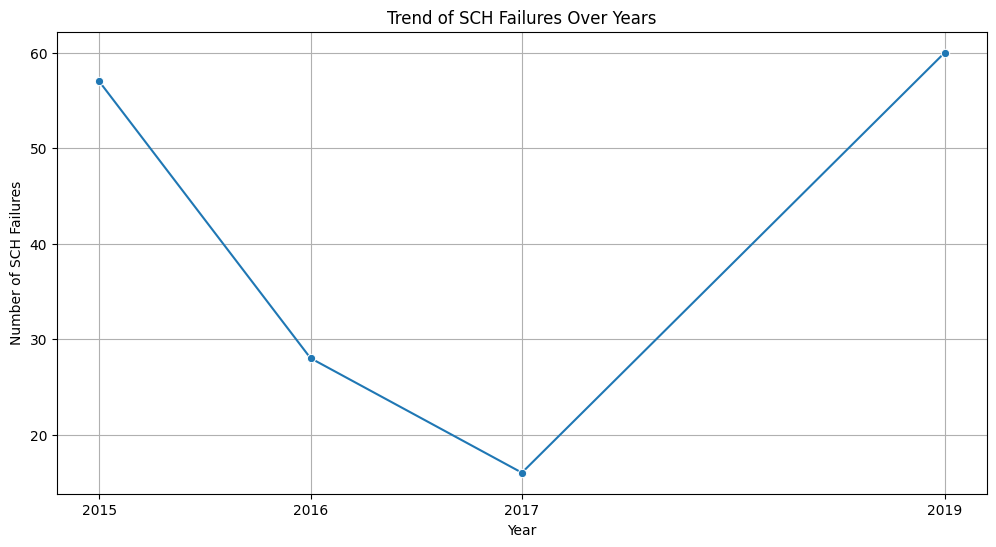

/var/folders/p4/5cc14tlj2rvd2dd0x8bjh8hm0000gn/T/ipykernel_47676/2963141583.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transmission', y='Counts', data=transmission_trends, ci=None)


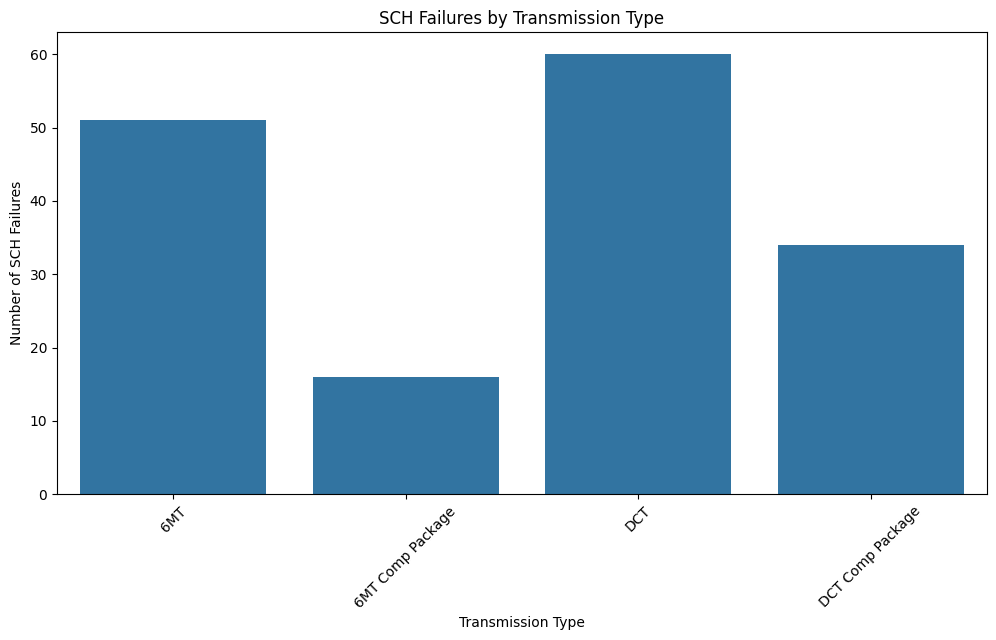

In [6]:

# Plot the trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Counts', data=yearly_trends, marker='o')
plt.title('Trend of SCH Failures Over Years')
plt.xlabel('Year')
plt.ylabel('Number of SCH Failures')
plt.xticks(ticks=years_of_interest, labels=years_of_interest)  # Set x-axis ticks to the specific years
plt.grid(True)  # Add grid lines for better readability
plt.show()

# Group by Transmission and sum Counts
transmission_trends = sch_failures.groupby('Transmission')['Counts'].sum().reset_index()

# Plot SCH Failures by Transmission Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Transmission', y='Counts', data=transmission_trends, ci=None)
plt.title('SCH Failures by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of SCH Failures')
plt.xticks(rotation=45)
plt.show()

In [7]:

# Determine the most common car combinations
common_combinations = cleaned_data.groupby(['Year', 'Transmission', 'Modification']).agg({
    'Counts': 'sum'
}).reset_index()

# Sort by the total counts in descending order
common_combinations = common_combinations.sort_values(by='Counts', ascending=False)

# Display the top 10 most common combinations as a table
print(common_combinations.head(10))  # Display the top 10 most common combinations


    Year      Transmission          Modification  Counts
7   2015               DCT                 Stock     155
19  2016               DCT                 Stock     115
4   2015               DCT  Modified 450-500 whp     112
3   2015               6MT                 Stock     109
55  2019  DCT Comp Package                 Stock     108
51  2019               DCT                 Stock      83
47  2019  6MT Comp Package                 Stock      64
11  2016               6MT                 Stock      60
43  2019               6MT                 Stock      56
5   2015               DCT  Modified 500-550 whp      54


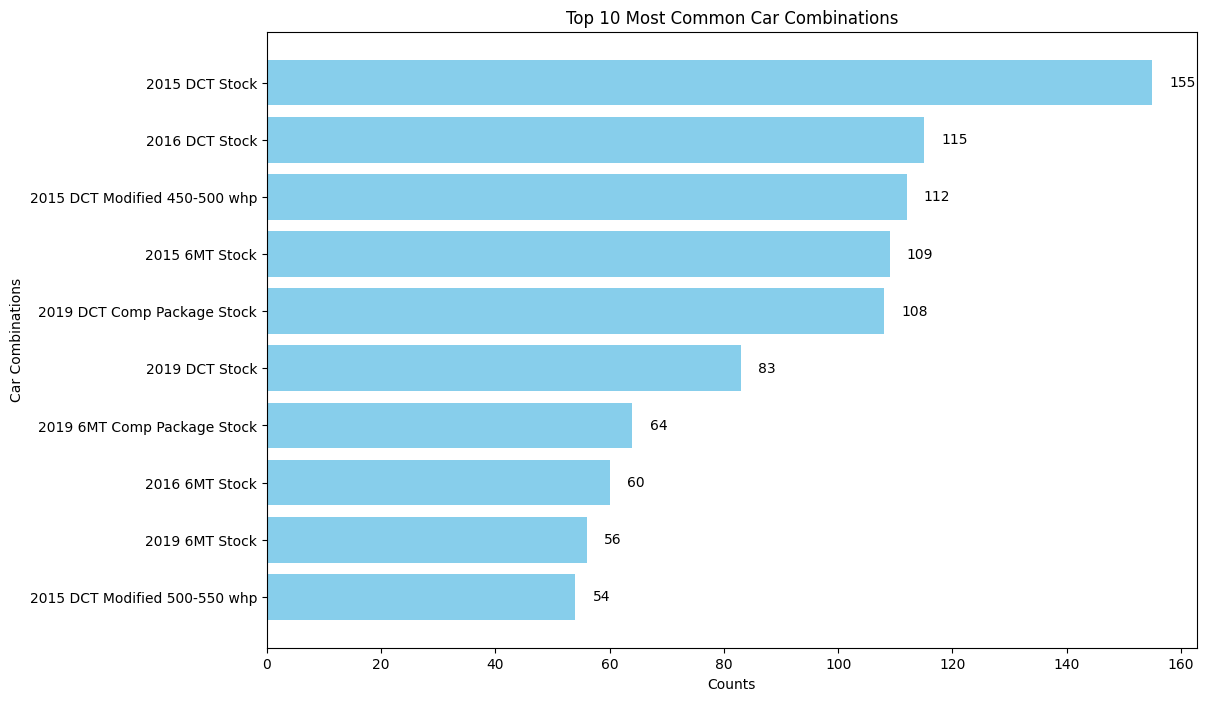

In [8]:

# Display the top 10 most common combinations
top_10_combinations = common_combinations.head(10)

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a bar plot
bars = ax.barh(top_10_combinations.apply(lambda x: f"{x['Year']} {x['Transmission']} {x['Modification']}", axis=1),
               top_10_combinations['Counts'],
               color='skyblue')

# Add labels and title
ax.set_xlabel('Counts')
ax.set_ylabel('Car Combinations')
ax.set_title('Top 10 Most Common Car Combinations')

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 3, bar.get_y() + bar.get_height()/2,
            f'{width}',
            va='center')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest counts on top
plt.show()

SCH_Status            No SCH  SCH Failure  Total  SCH Failure Percentage
Modification                                                            
Modified 450-500 whp     311           47    358               13.128492
Modified 500-550 whp     183           40    223               17.937220
Modified 550+ whp         91           44    135               32.592593
Stock                    883           30    913                3.285871


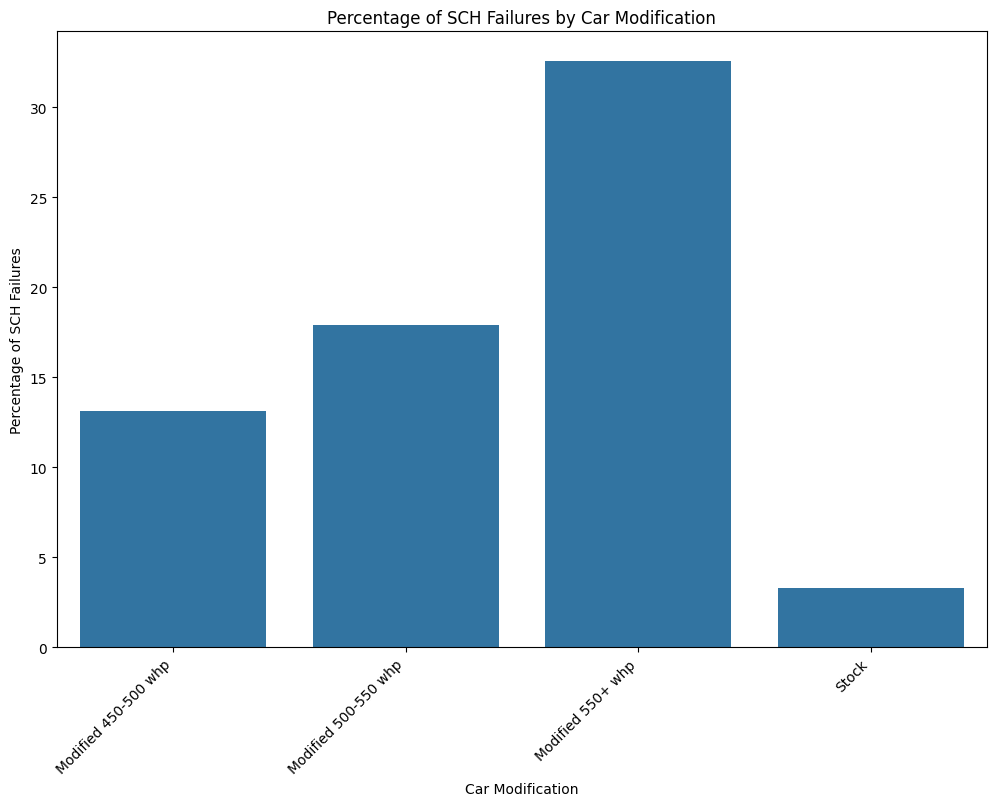

In [20]:

# Create a summary table for SCH failures by modification type
summary_table = cleaned_data.groupby(['Modification', 'SCH_Status'])['Counts'].sum().unstack().fillna(0)

# Calculate percentages for better comparison
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['SCH Failure Percentage'] = (summary_table['SCH Failure'] / summary_table['Total']) * 100

# Print the summary table
print(summary_table)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=summary_table.index, y='SCH Failure Percentage', data=summary_table.reset_index())
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of SCH Failures by Car Modification')
plt.xlabel('Car Modification')
plt.ylabel('Percentage of SCH Failures')
plt.show()

In [19]:
print(cleaned_data.columns)

Index(['Year', 'Transmission', 'Modification', 'SCH_Status', 'Counts',
       'Percentage of Whole'],
      dtype='object')


In [10]:

# Calculate summary statistics
summary_stats = data['Counts'].describe()
print(summary_stats)


count    112.000000
mean      14.544643
std       26.399866
min        0.000000
25%        2.000000
50%        4.000000
75%       13.250000
max      151.000000
Name: Counts, dtype: float64


In [11]:
# Specify the output file path
output_file = 'cleaned_dataset.xlsx'

# Export the DataFrame to an Excel file
cleaned_data.to_excel(output_file, index=False)

print(f"Dataset successfully exported to {output_file}")

Dataset successfully exported to cleaned_dataset.xlsx


In [12]:

# Calculate the total number of responses
total_responses = cleaned_data['Counts'].sum()
print(f"Total number of responses: {total_responses}")

Total number of responses: 1629


In [21]:
import pandas as pd
import statsmodels.api as sm

# Assuming `cleaned_data` is your DataFrame

# Filter for SCH_Status = SCH Failure
filtered_data = cleaned_data[cleaned_data['SCH_Status'] == 'SCH Failure']

# Convert categorical variables to dummy variables
filtered_data_dummies = pd.get_dummies(filtered_data, columns=['Modification', 'Transmission'], drop_first=True)

# Prepare the features and target variable
X = filtered_data_dummies[['Year'] + [col for col in filtered_data_dummies.columns if col.startswith('Modification') or col.startswith('Transmission')]]
y = filtered_data_dummies['Counts']

# Add a constant to the features matrix (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [23]:
import pandas as pd
import statsmodels.api as sm

# Assuming `cleaned_data` is your DataFrame

# Filter for SCH_Status = SCH Failure
filtered_data = cleaned_data[cleaned_data['SCH_Status'] == 'SCH Failure']

# Convert categorical variables to dummy variables
filtered_data_dummies = pd.get_dummies(filtered_data, columns=['Transmission', 'Modification'], drop_first=True)

# Prepare features and target variable
X = filtered_data_dummies[['Year'] + [col for col in filtered_data_dummies.columns if col.startswith('Transmission') or col.startswith('Modification')]]
y = filtered_data_dummies['Counts']

# Add a constant to the features matrix (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).